In [1]:
# using Spark to handle the data, reading the combined_data.csv, keeping the most occuring 4 events, handling missing values, and modeling 

In [2]:
# activating Java for Spark session
'''
export JAVA_HOME=/Library/Java/JavaVirtualMachines/temurin-11.jdk/Contents/Home
export PATH=$JAVA_HOME/bin:$PATH

'''

'\nexport JAVA_HOME=/Library/Java/JavaVirtualMachines/temurin-11.jdk/Contents/Home\nexport PATH=$JAVA_HOME/bin:$PATH\n\n'

In [3]:
import pandas as pd

from pyspark.sql import SparkSession

# Initialize SparkSession with increased memory allocation
spark = SparkSession.builder \
    .appName("MyProject") \
    .config("spark.driver.memory", "12g") \
    .config("spark.executor.memory", "12g") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/03 20:46:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Read the CSV file into a Spark DataFrame
combined_df = spark.read.csv("combined_data.csv", header=True, inferSchema=True)

# Show the first few rows to verify
combined_df.show()

+---+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+----------+----------+---------+----------+---------+----------+----------+--------+---------+---------+--------+--------+-----+-----+
|_c0|          timestamp|label|      well|            id|ABER-CKGL|ABER-CKP|ESTADO-DHSV|ESTADO-M1|ESTADO-M2|ESTADO-PXO|ESTADO-SDV-GL|ESTADO-SDV-P|ESTADO-W1|ESTADO-W2|ESTADO-XO|  P-ANULAR|P-JUS-CKGL|P-JUS-CKP|P-MON-CKGL|P-MON-CKP|     P-PDG|     P-TPT|     QGL|T-JUS-CKP|T-MON-CKP|   T-PDG|   T-TPT|class|state|
+---+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+----------+----------+---------+----------+---------+----------+----------+--------+---------+---------+--------+--------+-----+-----+
|  0|2014-12-17 14:27:45|    9|WELL-00042|20141217142745|     23.0|

24/11/03 20:47:40 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/11/03 20:47:40 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , timestamp, label, well, id, ABER-CKGL, ABER-CKP, ESTADO-DHSV, ESTADO-M1, ESTADO-M2, ESTADO-PXO, ESTADO-SDV-GL, ESTADO-SDV-P, ESTADO-W1, ESTADO-W2, ESTADO-XO, P-ANULAR, P-JUS-CKGL, P-JUS-CKP, P-MON-CKGL, P-MON-CKP, P-PDG, P-TPT, QGL, T-JUS-CKP, T-MON-CKP, T-PDG, T-TPT, class, state
 Schema: _c0, timestamp, label, well, id, ABER-CKGL, ABER-CKP, ESTADO-DHSV, ESTADO-M1, ESTADO-M2, ESTADO-PXO, ESTADO-SDV-GL, ESTADO-SDV-P, ESTADO-W1, ESTADO-W2, ESTADO-XO, P-ANULAR, P-JUS-CKGL, P-JUS-CKP, P-MON-CKGL, P-MON-CKP, P-PDG, P-TPT, QGL, T-JUS-CKP, T-MON-CKP, T-PDG, T-TPT, class, state
Expected: _c0 but found: 
CSV file: file:///Users/abdulatifalzawawi/Dropbox/Mac/Desktop/IE/3rd%20semester/Capstone%20Project/combined_data

In [5]:
# Display unique well values in the 'well' column
combined_df.select("well").distinct().show(50)


+----------+
|      well|
+----------+
|WELL-00034|
|WELL-00033|
|WELL-00016|
|WELL-00035|
|WELL-00020|
|WELL-00010|
|WELL-00014|
|WELL-00042|
|WELL-00041|
|WELL-00037|
|WELL-00040|
|WELL-00039|
|WELL-00038|
|WELL-00036|
|WELL-00015|
|WELL-00002|
|WELL-00006|
|WELL-00005|
|WELL-00008|
|WELL-00001|
|WELL-00004|
|WELL-00003|
|WELL-00007|
|WELL-00019|
|WELL-00021|
|WELL-00024|
|WELL-00022|
|WELL-00023|
|WELL-00026|
|WELL-00027|
|WELL-00030|
|WELL-00029|
|WELL-00031|
|WELL-00032|
|WELL-00028|
|WELL-00025|
|WELL-00013|
|WELL-00011|
|WELL-00012|
|WELL-00009|
| SIMULATED|
+----------+



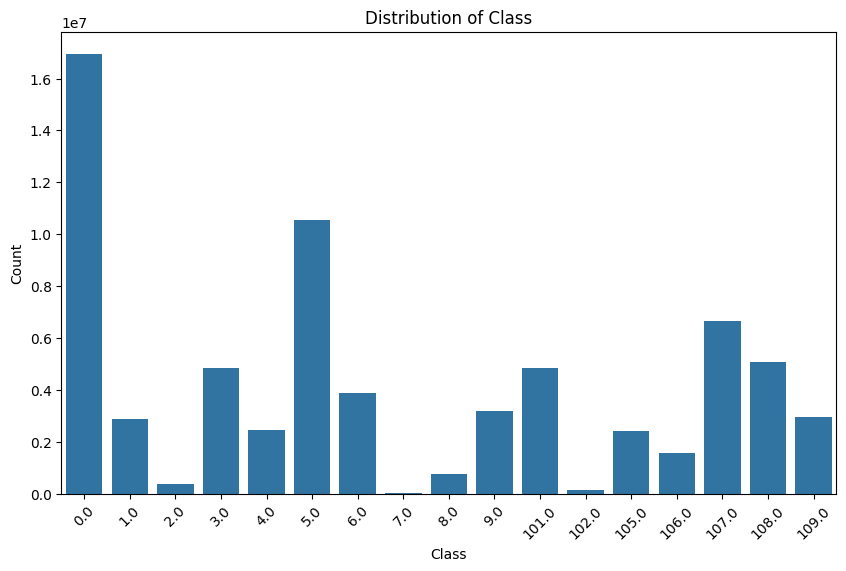

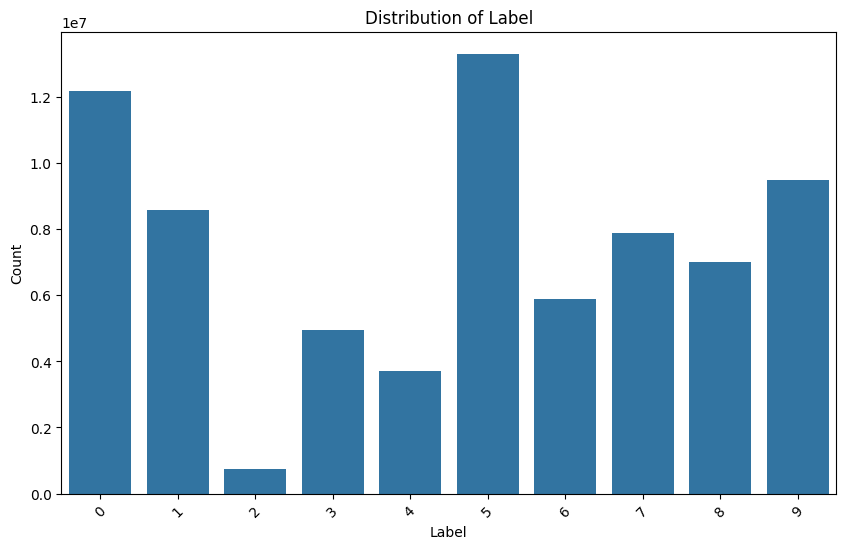

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the distribution of 'class' values in Spark and convert the result to Pandas
class_counts = combined_df.groupBy("class").count().orderBy("class").toPandas()

# Plot the distribution of 'class'
plt.figure(figsize=(10, 6))
sns.barplot(data=class_counts, x="class", y="count")
plt.title("Distribution of Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Count the distribution of 'label' values in Spark and convert the result to Pandas
label_counts = combined_df.groupBy("label").count().orderBy("label").toPandas()

# Plot the distribution of 'label'
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x="label", y="count")
plt.title("Distribution of Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [7]:
'''[NORMAL]
LABEL = 0
DESCRIPTION = Normal Operation

# This section defines default properties for a specific event type
#
[ABRUPT_INCREASE_OF_BSW]
LABEL = 1
DESCRIPTION = Abrupt Increase of BSW
TRANSIENT = True

# This section defines default properties for a specific event type
#
[SPURIOUS_CLOSURE_OF_DHSV]
LABEL = 2
DESCRIPTION = Spurious Closure of DHSV
TRANSIENT = True
WINDOW = 180
STEP = 15
 
# This section defines default properties for a specific event type
#
[SEVERE_SLUGGING]
LABEL = 3
DESCRIPTION = Severe Slugging
TRANSIENT = False

# This section defines default properties for a specific event type
#
[FLOW_INSTABILITY]
LABEL = 4
DESCRIPTION = Flow Instability
TRANSIENT = False

# This section defines default properties for a specific event type
#
[RAPID_PRODUCTIVITY_LOSS]
LABEL = 5
DESCRIPTION = Rapid Productivity Loss
TRANSIENT = True

# This section defines default properties for a specific event type
#
[QUICK_RESTRICTION_IN_PCK]
LABEL = 6
DESCRIPTION = Quick Restriction in PCK
TRANSIENT = True

# This section defines default properties for a specific event type
#
[SCALING_IN_PCK]
LABEL = 7
DESCRIPTION = Scaling in PCK
TRANSIENT = True

# This section defines default properties for a specific event type
#
[HYDRATE_IN_PRODUCTION_LINE]
LABEL = 8
DESCRIPTION = Hydrate in Production Line
TRANSIENT = True

# This section defines default properties for a specific event type
#
[HYDRATE_IN_SERVICE_LINE]
LABEL = 9
DESCRIPTION = Hydrate in Service Line
TRANSIENT = True
'''

'[NORMAL]\nLABEL = 0\nDESCRIPTION = Normal Operation\n\n# This section defines default properties for a specific event type\n#\n[ABRUPT_INCREASE_OF_BSW]\nLABEL = 1\nDESCRIPTION = Abrupt Increase of BSW\nTRANSIENT = True\n\n# This section defines default properties for a specific event type\n#\n[SPURIOUS_CLOSURE_OF_DHSV]\nLABEL = 2\nDESCRIPTION = Spurious Closure of DHSV\nTRANSIENT = True\nWINDOW = 180\nSTEP = 15\n \n# This section defines default properties for a specific event type\n#\n[SEVERE_SLUGGING]\nLABEL = 3\nDESCRIPTION = Severe Slugging\nTRANSIENT = False\n\n# This section defines default properties for a specific event type\n#\n[FLOW_INSTABILITY]\nLABEL = 4\nDESCRIPTION = Flow Instability\nTRANSIENT = False\n\n# This section defines default properties for a specific event type\n#\n[RAPID_PRODUCTIVITY_LOSS]\nLABEL = 5\nDESCRIPTION = Rapid Productivity Loss\nTRANSIENT = True\n\n# This section defines default properties for a specific event type\n#\n[QUICK_RESTRICTION_IN_PCK]\nL

In [8]:
# keeping the 4 most occuring labels + normal

labels_to_keep = [0, 1, 5, 7, 9]
classes_to_keep = [0, 1, 5, 7, 9, 101, 105, 107, 109]

# Filter the DataFrame in place to only keep rows that meet either the label or class condition
filtered_df = combined_df.filter(
    (combined_df["label"].isin(labels_to_keep)) | (combined_df["class"].isin(classes_to_keep))
)

filtered_df.show()


+---+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+----------+----------+---------+----------+---------+----------+----------+--------+---------+---------+--------+--------+-----+-----+
|_c0|          timestamp|label|      well|            id|ABER-CKGL|ABER-CKP|ESTADO-DHSV|ESTADO-M1|ESTADO-M2|ESTADO-PXO|ESTADO-SDV-GL|ESTADO-SDV-P|ESTADO-W1|ESTADO-W2|ESTADO-XO|  P-ANULAR|P-JUS-CKGL|P-JUS-CKP|P-MON-CKGL|P-MON-CKP|     P-PDG|     P-TPT|     QGL|T-JUS-CKP|T-MON-CKP|   T-PDG|   T-TPT|class|state|
+---+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+----------+----------+---------+----------+---------+----------+----------+--------+---------+---------+--------+--------+-----+-----+
|  0|2014-12-17 14:27:45|    9|WELL-00042|20141217142745|     23.0|

24/11/03 20:48:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , timestamp, label, well, id, ABER-CKGL, ABER-CKP, ESTADO-DHSV, ESTADO-M1, ESTADO-M2, ESTADO-PXO, ESTADO-SDV-GL, ESTADO-SDV-P, ESTADO-W1, ESTADO-W2, ESTADO-XO, P-ANULAR, P-JUS-CKGL, P-JUS-CKP, P-MON-CKGL, P-MON-CKP, P-PDG, P-TPT, QGL, T-JUS-CKP, T-MON-CKP, T-PDG, T-TPT, class, state
 Schema: _c0, timestamp, label, well, id, ABER-CKGL, ABER-CKP, ESTADO-DHSV, ESTADO-M1, ESTADO-M2, ESTADO-PXO, ESTADO-SDV-GL, ESTADO-SDV-P, ESTADO-W1, ESTADO-W2, ESTADO-XO, P-ANULAR, P-JUS-CKGL, P-JUS-CKP, P-MON-CKGL, P-MON-CKP, P-PDG, P-TPT, QGL, T-JUS-CKP, T-MON-CKP, T-PDG, T-TPT, class, state
Expected: _c0 but found: 
CSV file: file:///Users/abdulatifalzawawi/Dropbox/Mac/Desktop/IE/3rd%20semester/Capstone%20Project/combined_data.csv


In [9]:
#drop all columns with 100% missing values, covert timestamp to time, convert id to str, model 


from pyspark.sql.functions import col
from pyspark.sql.types import StringType, TimestampType

# Step 1: Drop columns with 100% missing values
filtered_df = filtered_df.select([col for col in filtered_df.columns if filtered_df.select(col).dropna().count() > 0])

# Step 2: Convert 'id' column to string
filtered_df = filtered_df.withColumn("id", col("id").cast(StringType()))

# Step 3: Convert 'timestamp' column to datetime
filtered_df = filtered_df.withColumn("timestamp", col("timestamp").cast(TimestampType()))

# Step 4: Drop the first column (assuming '_c0' or another name if applicable)
filtered_df = filtered_df.drop("_c0")

# Verify the results
filtered_df.printSchema()
print("Columns after cleaning:", filtered_df.columns)



24/11/03 20:48:44 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , label, class
 Schema: _c0, label, class
Expected: _c0 but found: 
CSV file: file:///Users/abdulatifalzawawi/Dropbox/Mac/Desktop/IE/3rd%20semester/Capstone%20Project/combined_data.csv


root
 |-- timestamp: timestamp (nullable = true)
 |-- label: integer (nullable = true)
 |-- well: string (nullable = true)
 |-- id: string (nullable = true)
 |-- ABER-CKGL: double (nullable = true)
 |-- ABER-CKP: double (nullable = true)
 |-- ESTADO-DHSV: double (nullable = true)
 |-- ESTADO-M1: double (nullable = true)
 |-- ESTADO-M2: double (nullable = true)
 |-- ESTADO-PXO: double (nullable = true)
 |-- ESTADO-SDV-GL: double (nullable = true)
 |-- ESTADO-SDV-P: double (nullable = true)
 |-- ESTADO-W1: double (nullable = true)
 |-- ESTADO-W2: double (nullable = true)
 |-- ESTADO-XO: double (nullable = true)
 |-- P-ANULAR: double (nullable = true)
 |-- P-JUS-CKGL: double (nullable = true)
 |-- P-JUS-CKP: double (nullable = true)
 |-- P-MON-CKGL: double (nullable = true)
 |-- P-MON-CKP: double (nullable = true)
 |-- P-PDG: double (nullable = true)
 |-- P-TPT: double (nullable = true)
 |-- QGL: double (nullable = true)
 |-- T-JUS-CKP: double (nullable = true)
 |-- T-MON-CKP: double (nul

In [10]:
import gc
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import NumericType


# Step 2: Separate numerical and non-numerical columns in `filtered_df`
numerical_columns = [field.name for field in filtered_df.schema.fields if isinstance(field.dataType, NumericType)]
non_numerical_columns = [field for field in filtered_df.columns if field not in numerical_columns]

# Calculate the percentage of missing values for each column
def calculate_missing_percent(df, columns, numeric_only=False):
    total_count = df.count()
    missing_percent_df = (
        df.select(
            [
                (
                    (count(when((isnan(c) if numeric_only else col(c).isNull()) | col(c).isNull(), c)) / total_count) * 100
                ).alias(c)
                for c in columns
            ]
        )
    )
    return missing_percent_df

# Calculate and show missing percentages for numerical columns
print("Missing values percentage for numerical columns:")
numerical_missing_percent = calculate_missing_percent(filtered_df, numerical_columns, numeric_only=True)
numerical_missing_percent.show()

# Calculate and show missing percentages for non-numerical columns
print("Missing values percentage for non-numerical columns:")
non_numerical_missing_percent = calculate_missing_percent(filtered_df, non_numerical_columns, numeric_only=False)
non_numerical_missing_percent.show()

# Step 3: Delete `numerical_df` and `non_numerical_df` after processing, if not needed
del numerical_missing_percent, non_numerical_missing_percent
gc.collect()  # Run garbage collection to free memory


Missing values percentage for numerical columns:


+-----+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|label|        ABER-CKGL|         ABER-CKP|      ESTADO-DHSV|        ESTADO-M1|        ESTADO-M2|       ESTADO-PXO|    ESTADO-SDV-GL|     ESTADO-SDV-P|       ESTADO-W1|       ESTADO-W2|        ESTADO-XO|         P-ANULAR|       P-JUS-CKGL|        P-JUS-CKP|      P-MON-CKGL|         P-MON-CKP|             P-PDG|            P-TPT|               QGL|         T-JUS-CKP|        T-MON-CKP|            T-PDG|            T-TPT|            class|            state|
+-----+-----------------+-----------------+-----------------+-----------------+---

+---------+----+---+
|timestamp|well| id|
+---------+----+---+
|      0.0| 0.0|0.0|
+---------+----+---+



872

In [11]:
from pyspark.sql.functions import col, last, avg
from pyspark.sql import Window



# Define state columns and numeric columns with special characters handled using backticks
state_columns = ["ESTADO-DHSV", "ESTADO-M1", "ESTADO-M2", "ESTADO-PXO", "ESTADO-SDV-GL", 
                 "ESTADO-SDV-P", "ESTADO-W1", "ESTADO-W2", "ESTADO-XO"]
numeric_columns = ["P-ANULAR", "P-JUS-CKGL", "P-JUS-CKP", "P-MON-CKGL", "P-MON-CKP", "P-PDG",
                   "P-TPT", "QGL", "T-JUS-CKP", "T-MON-CKP", "T-PDG", "T-TPT"]

# Forward fill state columns
window_spec = Window.orderBy("timestamp").rowsBetween(Window.unboundedPreceding, 0)
for col_name in state_columns:
    filtered_df = filtered_df.withColumn(
        col_name,
        last(col(col_name), ignorenulls=True).over(window_spec)
    )

# Fill numeric columns with their means
for col_name in numeric_columns:
    mean_value = filtered_df.agg(avg(f"`{col_name}`").alias("mean")).first()["mean"]
    filtered_df = filtered_df.fillna({col_name: mean_value})

# Drop rows with missing values in essential target columns
#filtered_df = filtered_df.na.drop(subset=["class", "state"])

# Verify the results
filtered_df.show()


24/11/03 21:05:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:05:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:05:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:06:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:06:04 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+--------------------+----------+--------------------+--------------------+---------+----------+---------+--------+-----------------+---------+--------+-----+-----+-----+
|          timestamp|label|      well|            id|ABER-CKGL|ABER-CKP|ESTADO-DHSV|ESTADO-M1|ESTADO-M2|ESTADO-PXO|ESTADO-SDV-GL|ESTADO-SDV-P|ESTADO-W1|ESTADO-W2|ESTADO-XO|            P-ANULAR|P-JUS-CKGL|           P-JUS-CKP|          P-MON-CKGL|P-MON-CKP|     P-PDG|    P-TPT|     QGL|        T-JUS-CKP|T-MON-CKP|   T-PDG|T-TPT|class|state|
+-------------------+-----+----------+--------------+---------+--------+-----------+---------+---------+----------+-------------+------------+---------+---------+---------+--------------------+----------+--------------------+--------------------+---------+----------+---------+--------+-----------------+---------+--

In [12]:
filtered_df = filtered_df.na.drop(subset=["class", "state"])

In [15]:
# model

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier

# Define feature columns, excluding the target and unnecessary non-numeric columns
feature_columns = [col for col in filtered_df.columns if col not in ["timestamp", "label", "class", "state", "id"]]

# Step 1: Index non-numeric columns (including well and lag columns)
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_indexed").fit(filtered_df) 
            for col in ["well", "well_lag1", "well_lag2", "well_lag3"]]

# Step 2: Replace original columns with indexed columns in feature_columns
indexed_feature_columns = [f"{col}_indexed" if col in ["well", "well_lag1", "well_lag2", "well_lag3"] 
                           else col for col in feature_columns]

# Step 3: Assemble all features into a single vector
assembler = VectorAssembler(inputCols=indexed_feature_columns, outputCol="features")

# Step 4: Scale features
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Step 5: Define the classifier
classifier = RandomForestClassifier(labelCol="label", featuresCol="scaledFeatures")

# Step 6: Create the pipeline
pipeline = Pipeline(stages=indexers + [assembler, scaler, classifier])

# Step 7: Split the data
train_df, test_df = filtered_df.randomSplit([0.8, 0.2], seed=42)

# Step 8: Train the model
model = pipeline.fit(train_df)

# Step 9: Predict on the test set
predictions = model.transform(test_df)

# Step 10: Show predictions
predictions.select("label", "prediction", "probability").show(5)




24/11/03 21:21:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:21:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:21:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:21:40 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:22:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 21:22:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 2

+-----+----------+--------------------+
|label|prediction|         probability|
+-----+----------+--------------------+
|    0|       0.0|[0.99997001820323...|
|    0|       0.0|[0.99997001820323...|
|    0|       0.0|[0.99997001820323...|
|    0|       0.0|[0.99997001820323...|
|    0|       0.0|[0.99997001820323...|
+-----+----------+--------------------+
only showing top 5 rows



In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Calculate accuracy
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score: {f1_score}")

# Additional metrics: Precision and Recall
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print(f"Precision: {precision}")

recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print(f"Recall: {recall}")


24/11/03 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:14:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:14:53 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 2

Accuracy: 0.9986684378456023


24/11/03 22:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:17:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:18:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 2

F1 Score: 0.9980041593903829


24/11/03 22:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:20:54 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:21:38 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 2

Precision: 0.9973428726444125


24/11/03 22:24:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:24:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:24:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:24:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:24:25 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 22:25:08 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/11/03 2

Recall: 0.9986684378456023


24/11/03 23:59:10 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 928871 ms exceeds timeout 120000 ms
24/11/03 23:59:10 WARN SparkContext: Killing executors is not supported by current scheduler.
24/11/04 00:16:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$